In [2]:
import pandas as pd
import numpy as np
import datetime

# Define a date range
start_date = datetime.date(2020, 1, 1)
end_date = datetime.date(2021, 12, 31)
date_range = pd.date_range(start_date, end_date)


# Simulate stock market dynamics
num_days = len(date_range)
initial_price = 100  # Starting price
volatility = 0.2   # Daily volatility (adjust as needed)

# Generate synthetic daily closing prices
closing_prices = [initial_price]
for i in range(1, num_days):
    price_change = np.random.normal(0, volatility)
    closing_price = closing_prices[i - 1] * (1 + price_change)
    closing_prices.append(closing_price)

# Simulate trading volume
average_volume = 50000
volume = np.random.normal(average_volume, average_volume / 10, num_days)
volume = np.abs(volume).astype(int)

# Create a DataFrame
data = pd.DataFrame({'Date': date_range, 'Close': closing_prices, 'Volume': volume})

# Add additional features (e.g., high, low, open prices)
data['Open'] = data['Close'].shift(1)  # Assume opening price is the previous day's closing price
data['High'] = data['Close'] + np.random.uniform(0, 5, num_days)
data['Low'] = data['Close'] - np.random.uniform(0, 5, num_days)

# Save the dataset to a CSV file
data.to_csv('stock_data.csv', index=False)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('/content/stock_data.csv')

data

,Date,Close,Volume,Open,High,Low
0,2020-01-01,1.000000e+02,59035,NaN,104.883088,96.336937
1,2020-01-02,7.551404e+01,41586,1.000000e+02,77.400044,72.090409
2,2020-01-03,5.905752e+01,44879,7.551404e+01,63.066719,57.997112
3,2020-01-04,4.978830e+01,48600,5.905752e+01,51.960955,48.593311
4,2020-01-05,4.609891e+01,45177,4.978830e+01,50.446574,44.692483
...,...,...,...,...,...,...
726,2021-12-27,6.515954e-07,50361,6.032753e-07,0.393134,-2.209268
727,2021-12-28,6.686757e-07,42498,6.515954e-07,1.654574,-1.733593
728,2021-12-29,6.583188e-07,46105,6.686757e-07,1.241438,-3.732260
729,2021-12-30,5.009419e-07,56755,6.583188e-07,4.940070,-4.467549


In [6]:
data.head()

,Date,Close,Volume,Open,High,Low
0,2020-01-01,100.000000,59035,NaN,104.883088,96.336937
1,2020-01-02,75.514035,41586,100.000000,77.400044,72.090409
2,2020-01-03,59.057518,44879,75.514035,63.066719,57.997112
3,2020-01-04,49.788300,48600,59.057518,51.960955,48.593311
4,2020-01-05,46.098906,45177,49.788300,50.446574,44.692483


In [7]:
data.tail()

,Date,Close,Volume,Open,High,Low
726,2021-12-27,6.515954e-07,50361,6.032753e-07,0.393134,-2.209268
727,2021-12-28,6.686757e-07,42498,6.515954e-07,1.654574,-1.733593
728,2021-12-29,6.583188e-07,46105,6.686757e-07,1.241438,-3.732260
729,2021-12-30,5.009419e-07,56755,6.583188e-07,4.940070,-4.467549
730,2021-12-31,6.463080e-07,54430,5.009419e-07,1.946950,-3.783945


In [8]:
# Feature engineering (adding lagged values)
data['Close_Lagged'] = data['Close'].shift(1)
data.dropna(inplace=True)

# Split the data into training and testing sets
X = data[['Close_Lagged']]
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 13.452461480003082


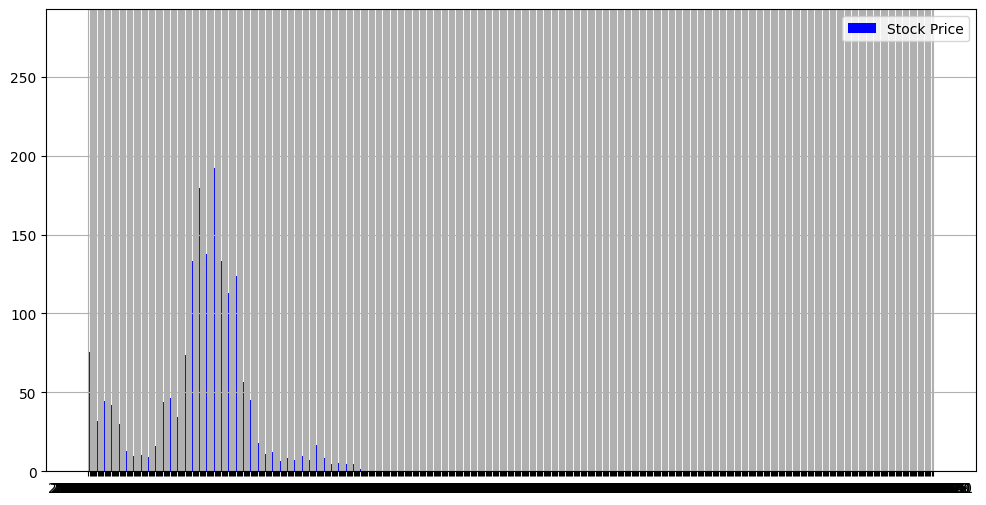

In [13]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Plot using bar plot
plt.figure(figsize=(12, 6))
plt.bar(data['Date'], data['Close'], width=1, align='edge', color='blue', label='Stock Price')
plt.legend()
plt.grid(True)
plt.show()



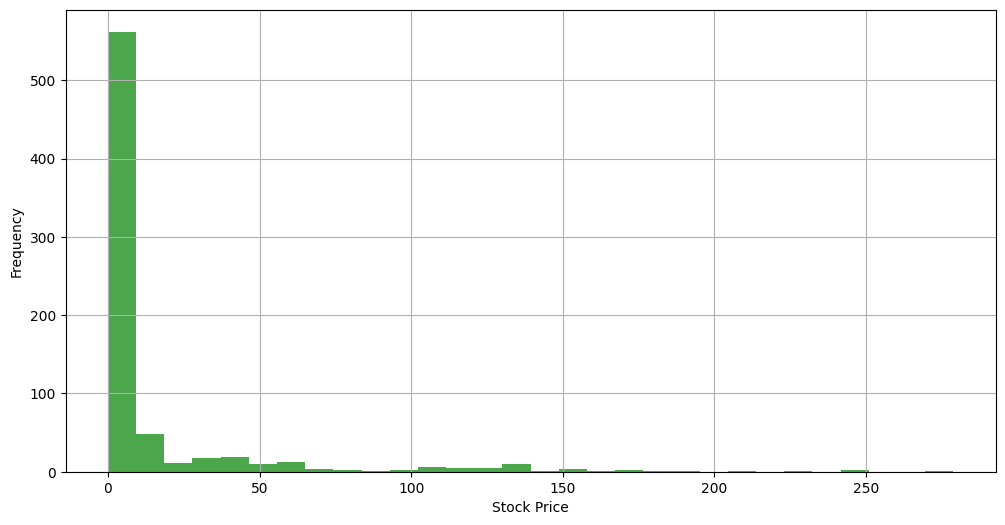

In [12]:
# Plot using histogram
plt.figure(figsize=(12, 6))
plt.hist(data['Close'], bins=30, color='green', alpha=0.7)
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
